In [10]:
### Libraries

import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc
from IPython.display import Image

% matplotlib inline

---

**BEGIN CONTENT HERE**

---

### Variable Selection

Despite all we have learned, iterating over Bayesian logistic regression model features is computationally intensive. Therefore, we decided to use the variable importance measure from random forests to decide which predictors to include in our Bayesian logistic regression. The variable importance measure is computed from permuting out-of-bag data: For each tree, the prediction classification error on the out-of-bag portion of the data is recorded. Then the same is done after permuting each predictor variable. The difference between the two are then averaged over all trees, and normalized by the standard deviation of the differences. The predictor with the most decrease in prediction accuracy would have the highest importance. 

We trained a random forest on the data set using location (home, away, or neutral) and quantitative features that measure the differences in the team statistics per game. We then computed the relative importance of each predictor and iterated over the N most important predictors. For each iteration, we estimated the test accuracy with 10-fold cross validation on the training data, 2015 regular season games. As shown in the chart below, as N increases, the cross-validation accuracy score increases but levels off after N = 5. Therefore, we included the 5 most important features from the random forest as our predictors: diff_Pythag, diff_AdjOE, diff_AdjDE, location_Away, and diff_RankAdjDE.

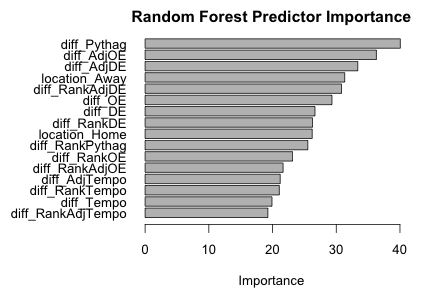

In [14]:
Image(filename='RF Importance.png')

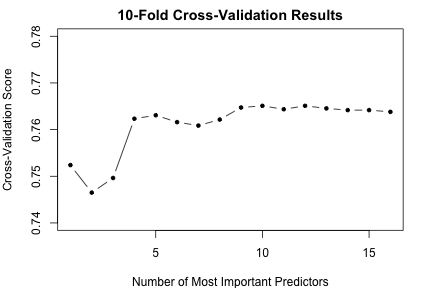

In [15]:
Image(filename='XVal Scores.png')

### Priors

As for priors for the Bayesian logistic regression, we fitted a logistic regression on 2014 data with the 5 predictors and assigned the coefficient estimates as the prior means shown in the table below. We decided to assign uninformative prior standard deviations for the coefficients at 10.